# Case Study #06 -Data Preprocessing

Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target

# 1. Load the dataset into python environment.

In [124]:
#import all the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

In [125]:
# Loading the CSV file into the pandas dataframe.

data = pd.read_csv(r'C:\Users\Aneesh\Downloads\titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [126]:
d = data.set_index('PassengerId')

In [127]:
d

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [128]:
# use describe funtion to find the descriptive statistics of columns
d.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
# to identify number of rows and columns
d.shape

(891, 11)

In [130]:
# to identify the data type of each column
d.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [131]:
# to check if there is any null value
d.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

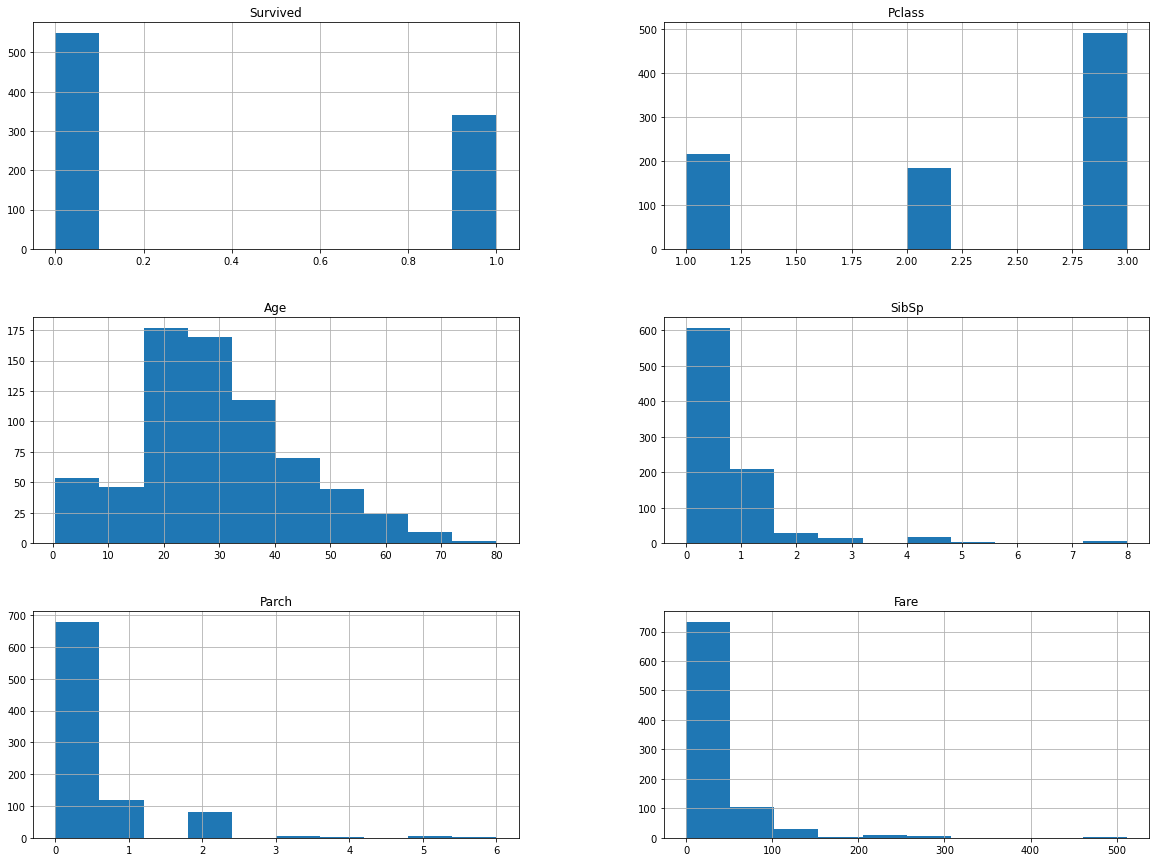

In [132]:
d.hist(figsize=(20,15))

# 4. Filling in all the missing values present in all the columns in the dataset

In [133]:
len(data)

891

In [134]:
#finding percentile of missing data in each column
missing = data.isnull().sum() * 100 / len(data)
missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [135]:
#the distribution of column 'Age' is right skewed,so we have to fill the null values using median
d['Age'] = d['Age'].fillna(d['Age'].median())

In [137]:
d.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [138]:
#since the column "cabin" contains more than 50% null values we can drop it.
d.drop('Cabin',axis=1,inplace=True)
d

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [139]:
#to fill the missing values in a categorical data we can replace them with the most common or occurring value. 
d['Embarked'].mode()

0    S
dtype: object

In [140]:
d['Embarked'] = d['Embarked'].fillna('S')

In [141]:
d.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

This shows that all the null values are removed from the given dataset.

# 5. Check and handle outliers in at least 3 columns in the dataset

In [142]:
d.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Box plot of Survived')

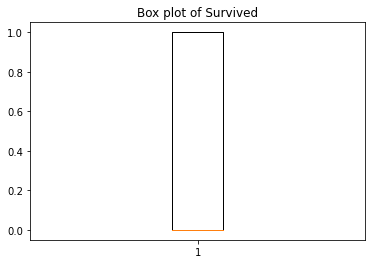

In [143]:
# to check whether outliers are present in the dataset 
# we will plot box plots of different numerical variables

#checking outliers in 'Survived' column
plt.boxplot(d['Survived'])
plt.title("Box plot of Survived")

It shows no outliers in "survived" column

Text(0.5, 1.0, 'Box plot of Pclass')

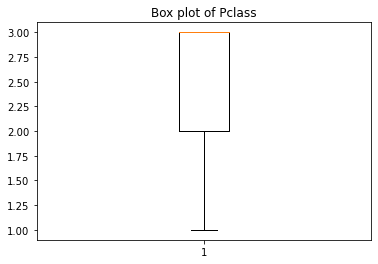

In [144]:
#checking outliers in 'Pclass column

plt.boxplot(d['Pclass'])
plt.title("Box plot of Pclass")

It shows no outliers on "Pclass"

Text(0.5, 1.0, 'Box Plot Of Age')

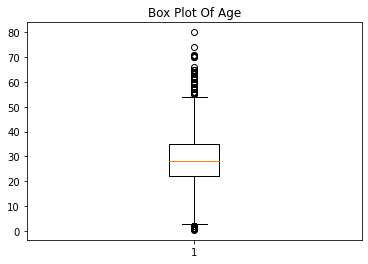

In [145]:
#checking outliers in 'Age' column
plt.boxplot(d['Age'])
plt.title('Box Plot Of Age')

In [146]:
# outliers are present in the 'Age' column , using the interquartile range we canmanage the outliers
#create variable Q1,Q2,Q3 using the percentile parameter in numpy

Q1 = np.percentile(d['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(d['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(d['Age'], 75, interpolation='midpoint')
print('Q1 is ',Q1,
      '\nQ2 is',Q2,
      '\nQ3 is',Q3)


Q1 is  22.0 
Q2 is 28.0 
Q3 is 35.0


In [147]:
#check the median of 'Age' coloumn & Q2
d['Age'].median()

28.0

In [148]:
#interquartile range IQR
IQR = Q3-Q1
IQR

13.0

In [149]:
#creating a variable lower limit and upper limit
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [150]:
print('lower limit is',low_lim,
     '\nupper limit is',up_lim)

lower limit is 2.5 
upper limit is 54.5


In [151]:
# we can remove all the values less than 2.5 and greater than 54.5
# inorder to do that we have to create a loop

outlier = [] 
for x in data['Age']: 
    if((x > up_lim) or (x < low_lim)): 
      outlier.append(x)

In [152]:
print('outlier =',outlier)

outlier = [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [153]:
# to ind1 and am locating the index values of those values greater than upper limit 
ind1 = d['Age'] > up_lim 
d.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [154]:
#we can drop it using data.drop
d.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [155]:
# to ind2 and am locating the index values of those values less than upper limit 
ind2 = d['Age'] < low_lim 
d.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [156]:
d.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

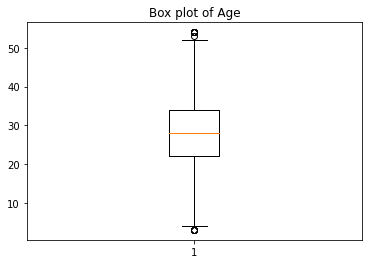

In [157]:
#again plot spirit  'Age'  and check outliers are reduced
plt.boxplot(d['Age'])
plt.title('Box plot of Age')

By comparing the two box plots of "Age" we can see that the outliers is reduced.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [158]:
d.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [159]:
from sklearn import preprocessing
x = d.drop(["Survived","Sex","Name","Ticket","Embarked"], axis = 1)
y = d["Survived"]

In [160]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2.341818,28.515152,0.507879,0.357576,31.483615
std,0.824096,10.177256,1.090670,0.798599,49.956429
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,13.416700
75%,3.000000,34.000000,1.000000,0.000000,30.070800
max,3.000000,54.000000,8.000000,6.000000,512.329200


In [161]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [162]:
x = min_max.fit_transform(x)

In [163]:
x = min_max.fit_transform(x)
x=pd.DataFrame(x)

In [164]:
x.describe()

,0,1,2,3,4
count,825.000000,825.000000,825.000000,825.000000,825.000000
mean,0.670909,0.500297,0.063485,0.059596,0.061452
std,0.412048,0.199554,0.136334,0.133100,0.097508
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.372549,0.000000,0.000000,0.015412
50%,1.000000,0.490196,0.000000,0.000000,0.026188
75%,1.000000,0.607843,0.125000,0.000000,0.058694
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [165]:
#Performing linear regression model

from sklearn.model_selection import train_test_split

from sklearn import linear_model

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()

model = lr.fit(x_train,y_train)
predicitons = model.predict(x_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('MSE:',mean_squared_error(y_test,predicitons))
print('R2:',r2_score(y_test,predicitons))

MSE: 0.1979258242719691
R2: 0.17530906553346215
